In [35]:
import os
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True) #do not miss this line
import warnings
warnings.filterwarnings("ignore")

In [36]:
datafile = 'C:/Users/Shiwani Sabnis/PycharmProjects/Social Media/data_elonmusk.csv'

In [37]:
import pandas as pd
df = pd.read_csv(datafile, encoding='latin1')
df = df.assign(Time=pd.to_datetime(df.Time)).drop('row ID', axis='columns')

print("Number of tweets: ",len(df['Tweet']))
df.head(5)

Number of tweets:  3218


,Tweet,Time,Retweet from,User
0,@MeltingIce Assuming max acceleration of 2 to ...,2017-09-29 17:39:19,NaN,elonmusk
1,RT @SpaceX: BFR is capable of transporting sat...,2017-09-29 10:44:54,SpaceX,elonmusk
2,@bigajm Yup :),2017-09-29 10:39:57,NaN,elonmusk
3,Part 2 https://t.co/8Fvu57muhM,2017-09-29 09:56:12,NaN,elonmusk
4,Fly to most places on Earth in under 30 mins a...,2017-09-29 09:19:21,NaN,elonmusk


In [38]:
'''import plotly.plotly as py
import plotly.graph_objs as go
'''
df['Time'] = pd.to_datetime(df['Time'], format='%y-%m-%d %H:%M:%S')
tweetsT = df['Time']

trace = go.Histogram(
    x=tweetsT,
    marker=dict(
        color='blue'
    ),
    opacity=0.75
)

layout = go.Layout(
    title='Tweet Activity Over Years',
    height=450,
    width=1200,
    xaxis=dict(
        title='Month and year'
    ),
    yaxis=dict(
        title='Tweet Quantity'
    ),
    bargap=0.2,
)

data = [trace]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [39]:
corpus=[]
a=[]
for i in range(len(df['Tweet'])):
        a=df['Tweet'][i]
        corpus.append(a)
        
corpus[0:10]

["@MeltingIce Assuming max acceleration of 2 to 3 g's, but in a comfortable direction. Will feel like a mild to moder? https://t.co/fpjmEgrHfC",
 'RT @SpaceX: BFR is capable of transporting satellites to orbit, crew and cargo to the @Space_Station and completing missions to the Moon an?',
 '@bigajm Yup :)',
 'Part 2 https://t.co/8Fvu57muhM',
 'Fly to most places on Earth in under 30 mins and anywhere in under 60. Cost per seat should be? https://t.co/dGYDdGttYd',
 'RT @SpaceX: Supporting the creation of a permanent, self-sustaining human presence on Mars. https://t.co/kCtBLPbSg8 https://t.co/ra6hKsrOcG',
 'BFR will take you anywhere on Earth in less than 60 mins https://t.co/HWt9BZ1FI9',
 'Mars City\nOpposite of Earth. Dawn and dusk sky are blue on Mars and day sky is red. https://t.co/XHcZIdgqnb',
 'Moon Base Alpha https://t.co/voY8qEW9kl',
 "Will be announcing something really special at today's talk https://t.co/plXTBJY6ia"]

In [40]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "C:\Users\SHIWAN~1\AppData\Local\Temp" will be used to save temporary dictionary and corpus.


In [41]:
list1 = ['RT','rt']
stoplist = stopwords.words('english') + list(punctuation) + list1

texts = [[word for word in str(document).lower().split() if word not in stoplist] for document in corpus]

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference


2022-05-09 22:24:25,056 : INFO : adding document #0 to Dictionary<0 unique tokens: []>
2022-05-09 22:24:25,155 : INFO : built Dictionary<11842 unique tokens: ['2', '3', '@meltingice', 'acceleration', 'assuming']...> from 3218 documents (total 30256 corpus positions)
2022-05-09 22:24:25,156 : INFO : Dictionary lifecycle event {'msg': "built Dictionary<11842 unique tokens: ['2', '3', '@meltingice', 'acceleration', 'assuming']...> from 3218 documents (total 30256 corpus positions)", 'datetime': '2022-05-09T22:24:25.156787', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'created'}
2022-05-09 22:24:25,156 : INFO : Dictionary lifecycle event {'fname_or_handle': 'C:\\Users\\SHIWAN~1\\AppData\\Local\\Temp\\elon.dict', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2022-05-09T22:24:25.156787', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28

In [42]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  

2022-05-09 22:24:30,585 : INFO : storing corpus in Matrix Market format to C:\Users\SHIWAN~1\AppData\Local\Temp\elon.mm
2022-05-09 22:24:30,593 : INFO : saving sparse matrix to C:\Users\SHIWAN~1\AppData\Local\Temp\elon.mm
2022-05-09 22:24:30,593 : INFO : PROGRESS: saving document #0
2022-05-09 22:24:30,619 : INFO : PROGRESS: saving document #1000
2022-05-09 22:24:30,643 : INFO : PROGRESS: saving document #2000
2022-05-09 22:24:30,675 : INFO : PROGRESS: saving document #3000
2022-05-09 22:24:30,683 : INFO : saved 3218x11842 matrix, density=0.079% (29959/38107556)
2022-05-09 22:24:30,691 : INFO : saving MmCorpus index to C:\Users\SHIWAN~1\AppData\Local\Temp\elon.mm.index


In [43]:
tfidf = models.TfidfModel(corpus)

2022-05-09 22:24:32,328 : INFO : collecting document frequencies
2022-05-09 22:24:32,335 : INFO : PROGRESS: processing document #0
2022-05-09 22:24:32,397 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 3218 documents and 11842 features (29959 matrix non-zeros)', 'datetime': '2022-05-09T22:24:32.397536', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'initialize'}


In [44]:
corpus_tfidf = tfidf[corpus]

In [45]:
total_topics = 10

In [46]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf]

2022-05-09 22:24:41,426 : INFO : using symmetric alpha at 0.1
2022-05-09 22:24:41,434 : INFO : using symmetric eta at 0.1
2022-05-09 22:24:41,434 : INFO : using serial LDA version on this node
2022-05-09 22:24:41,457 : INFO : running online (single-pass) LDA training, 10 topics, 1 passes over the supplied corpus of 3218 documents, updating model once every 2000 documents, evaluating perplexity every 3218 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-09 22:24:41,465 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-09 22:24:41,466 : INFO : PROGRESS: pass 0, at document #2000/3218
2022-05-09 22:24:42,683 : INFO : merging changes from 2000 documents into a model of 3218 documents
2022-05-09 22:24:42,702 : INFO : topic #4 (0.100): 0.006*"tesla" + 0.005*"@spacex:" + 0.005*"3" + 0.005*"falcon" + 0.005*"model" + 0.004*"one" + 0.004*"launch" + 0.003*"like" + 0.003*"9" + 0.003*

In [47]:
lda.show_topics(total_topics,10)

[(0,
  '0.012*"falcon" + 0.010*"launch" + 0.007*"tesla" + 0.006*"9" + 0.005*"..." + 0.005*"live" + 0.004*"@spacex:" + 0.004*"back" + 0.004*"like" + 0.004*"model"'),
 (1,
  '0.018*"model" + 0.015*"tesla" + 0.007*"test" + 0.007*"w" + 0.005*"first" + 0.005*"next" + 0.005*"landing" + 0.005*"driving" + 0.005*"still" + 0.005*"@elonmusk"'),
 (2,
  '0.012*"rocket" + 0.007*"new" + 0.007*"landing" + 0.005*"launch" + 0.005*"tesla" + 0.005*"good" + 0.004*"co2" + 0.004*"tmrw" + 0.004*"flight" + 0.004*"read"'),
 (3,
  '0.010*"@elonmusk" + 0.006*"..." + 0.005*"make" + 0.005*"cars" + 0.004*"one" + 0.004*"even" + 0.004*"spacex" + 0.004*"high" + 0.004*"love" + 0.004*"4"'),
 (4,
  '0.009*"falcon" + 0.009*"launch" + 0.008*"landing" + 0.008*"@spacex:" + 0.007*"9" + 0.007*"canaveral" + 0.007*"rocket" + 0.007*"cape" + 0.006*"tesla" + 0.006*"thanks"'),
 (5,
  '0.014*"tesla" + 0.012*"model" + 0.009*"like" + 0.008*"..." + 0.007*"new" + 0.007*"climate" + 0.007*"good" + 0.006*"change" + 0.006*"@teslamotors" + 0.0

In [48]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [49]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(10, 152)


In [50]:
df_lda

,falcon,launch,tesla,9,...,live,@spacex:,back,like,model,...,company,head,#dragon,orbit,help,reports,something,ever,consumer,govt
0,0.012066,0.009663,0.006924,0.005797,0.005108,0.005009,0.004478,0.004262,0.004253,0.004252,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.015175,0.000000,0.000000,0.000000,0.004301,0.000000,0.000000,0.018210,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.004903,0.004764,0.000000,0.000000,0.000000,0.000000,0.000000,0.003751,0.003787,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.002540,0.000000,0.000000,0.006137,0.000000,0.000000,0.000000,0.003552,0.003117,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.009146,0.009068,0.006373,0.007285,0.000000,0.000000,0.007783,0.000000,0.004329,0.004051,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.013833,0.000000,0.008162,0.000000,0.000000,0.000000,0.009489,0.011790,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.002865,0.006774,0.000000,0.000000,0.000000,0.000000,0.000000,0.003254,0.003835,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.007176,0.017963,0.000000,0.000000,0.000000,0.003841,0.000000,0.000000,0.006454,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.011694,0.000000,0.000000,0.000000,0.000000,0.000000,0.003750,0.008072,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.009458,0.008723,0.008732,0.007112,0.000000,0.000000,0.008560,0.000000,0.000000,0.006711,...,0.004155,0.004051,0.00371,0.003402,0.003283,0.003235,0.003233,0.003213,0.003187,0.003169


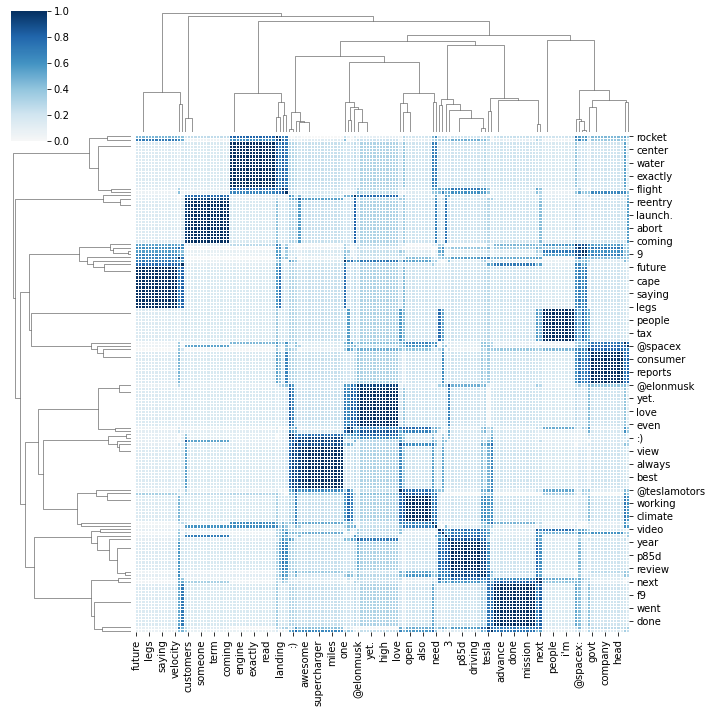

In [54]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(10, 10))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [52]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      32.420952   8.115230       1        1  54.932832
4       0.648955  71.707100       2        1   5.007765
7      71.019684   9.971006       3        1   5.007636
5       3.785981  33.185135       4        1   5.007597
0     -42.666500  -9.222070       5        1   5.007489
3      -3.621689 -43.526516       6        1   5.007450
9      -3.632402  -4.171708       7        1   5.007377
6     -36.584400  35.804413       8        1   5.007320
2      44.391380  50.615383       9        1   5.007271
8      40.235809 -31.591665      10        1   5.007262, topic_info=          Term       Freq      Total Category  logprob  loglift
231      tesla  39.000000  39.000000  Default  30.0000  30.0000
82      falcon   9.000000   9.000000  Default  29.0000  29.0000
580      model  40.000000  40.000000  Default  28.0000  28.0000
329     launch  10.000000  10.000000  Default  27.0000  27.0000
15    @spacex:  12.000000  12.000000  Default  26.0000  26.0000
...        ...        ...        ...      ...      ...      ...
1397    almost   0.413141   2.059507  Topic10  -5.9662   1.3878
83       first   0.523862  12.230158  Topic10  -5.7288  -0.1562
1250   station   0.435767   4.396786  Topic10  -5.9129   0.6828
959   software   0.411544   2.599517  Topic10  -5.9701   1.1511
153        yes   0.392325   1.936510  Topic10  -6.0179   1.3977

[683 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1013      1  0.454683  #dragon
1013      7  0.454683  #dragon
272       4  0.243512      ...
272       5  0.243512      ...
272       6  0.243512      ...
...     ...       ...      ...
160       8  0.152538    would
160      10  0.152538    would
3365      1  0.893711     year
153       3  0.516393      yes
144       1  0.798277     yes,

[322 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 8, 6, 1, 4, 10, 7, 3, 9])